### Part I - Reddit Data Collection


In [7]:
### import praw
import datetime
import csv
import praw
import os
from pathlib import Path

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

#subreddit name list
sub_name = ['india']

#number of post to retrieve
post_num = 250

#OAuth credentials from reddit account
reddit = praw.Reddit(
                     client_id='hDIJdjc2k5VzTA',
                     client_secret='fT9JnoUGAUAqDipudbAZ1XgeLFM',
                     username='HelloWorld13211',
                     password='Qwerty@123',
                     user_agent='web scrapper'
                     )

#writing retrieved list of posts into csv
def write_csv(to_csv, csv_name):
    try:
        with open(csv_name, 'w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerows(to_csv)
            file.close()
    except Exception as e:
        print(e)

#retrieve post from reddit ~ duh
def retrieve_post(sub,post_number,csv_name):
    subreddit = reddit.subreddit(sub)
    sub_hot = subreddit.hot(limit=post_number)
    to_csv = [['flair_name','title']]
    
    print('Scrapping {}...'.format(sub))
    try:
        for post in sub_hot:
            if not post.stickied:
                retrieved = [
                            post.link_flair_text,
                            post.title,
                            ]
                
                to_csv.append(retrieved)
               
        write_csv(to_csv, csv_name)
    except Exception as e:
        print(e)

for sub in sub_name:
    #Note: The csv file names are saved in {subreddit name}_yyyymmdd.csv format
    csv_name = '{}.csv'.format(sub)
    #csv path
    csv_file = Path(csv_name)

    #check if csv file already exist to prevent overwriting before retrieving post from reddit
    if csv_file.exists():
        print('File {} already exist!'.format(csv_name))
    else:
        retrieve_post(sub,post_num,csv_name)
    print("done")


File india.csv already exist!
done


### Reading of CSV File & print the following


In [40]:
import numpy as np
import pandas as pd
df=pd.read_csv("india.csv")
df

,flair_name,title
0,Non-Political,"To the 10 or so people who are gonna see this,..."
1,Coronavirus,Tomorrow is one year anniversary of how bangin...
2,Culture & Heritage,Muslims helped rebuild the Dasna temple that n...
3,Coronavirus,JUST IN | Uttarakhand Chief Minister Tirath Si...
4,Politics,"BJP Workers Not Infected With Covid As They ""W..."
...,...,...
243,Coronavirus,Why we can't compare Covid-19 vaccines?
244,Non-Political,India ranks 139 out of 149 countries in World ...
245,Politics,The farmers’ protest may grow into a second “t...
246,AskIndia,Why cant we just buy out the IP of Bharat Biot...


In [41]:
df['flair_name'].value_counts()

Politics               69
AskIndia               42
Non-Political          40
Coronavirus            19
Law & Courts           17
Foreign Relations      15
Culture & Heritage     14
History                 9
Science/Technology      7
Policy/Economy          7
Business/Finance        3
Art/Photo (OC)          3
| Repost |              1
Food                    1
Name: flair_name, dtype: int64

In [44]:
df.flair_name=pd.Categorical(df.flair_name)
df['flair']=df.flair_name.cat.codes
df

,flair_name,title,flair
0,Non-Political,"To the 10 or so people who are gonna see this,...",9
1,Coronavirus,Tomorrow is one year anniversary of how bangin...,3
2,Culture & Heritage,Muslims helped rebuild the Dasna temple that n...,4
3,Coronavirus,JUST IN | Uttarakhand Chief Minister Tirath Si...,3
4,Politics,"BJP Workers Not Infected With Covid As They ""W...",11
...,...,...,...
243,Coronavirus,Why we can't compare Covid-19 vaccines?,3
244,Non-Political,India ranks 139 out of 149 countries in World ...,9
245,Politics,The farmers’ protest may grow into a second “t...,11
246,AskIndia,Why cant we just buy out the IP of Bharat Biot...,1


In [56]:
dict(enumerate(df['flair_name'].cat.categories))

{0: 'Art/Photo (OC)',
 1: 'AskIndia',
 2: 'Business/Finance',
 3: 'Coronavirus',
 4: 'Culture & Heritage ',
 5: 'Food',
 6: 'Foreign Relations',
 7: 'History ',
 8: 'Law & Courts',
 9: 'Non-Political',
 10: 'Policy/Economy',
 11: 'Politics',
 12: 'Science/Technology',
 13: '| Repost |'}

### Part II- Exploratory Data Analysis
This analysis is done on terms of graph.

The first graph describes the relation b/w each Flair_name and the no of posts.
this means that how many Post of a particular Flair_name exists. 

Politics               69
AskIndia               42
Non-Political          40
Coronavirus            19
Law & Courts           17
Foreign Relations      15
Culture & Heritage     14
History                 9
Science/Technology      7
Policy/Economy          7
Business/Finance        3
Art/Photo (OC)          3
| Repost |              1
Food                    1
Name: flair_name, dtype: int64

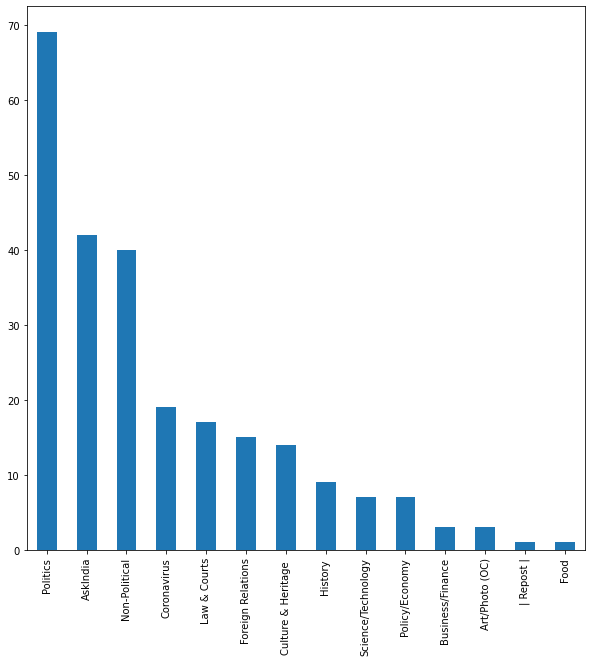

In [54]:
import matplotlib.pyplot as plt
flair_count = pd.value_counts(df.flair_name)
plt.figure(figsize=(10,10))
flair_count.plot(kind="bar")
flair_count

This graph shows the occurance of the different word in the post_title.

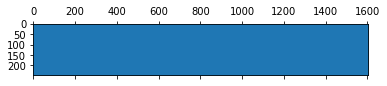

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
data_x=df.title
data_y=df.flair
cv=TfidfVectorizer(min_df=1)
X=cv.fit_transform(data_x)
Y=data_y.astype(int)
plt.spy(X)

### Part III - Flare Detector


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=4)
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
title=input("Enter the title : ")
title=cv.transform([title])
index=mnb.predict(title)
index=int(index)
result=df.flair_name.cat.categories[index]

Enter the title : India has several human rights issues, says US report


In [21]:
print(result)

Politics


In [33]:
import joblib

In [38]:
joblib.dump(cv,"transformer.pkl")

['transformer.pkl']

In [39]:
joblib.load("transformer.pkl")

TfidfVectorizer()

In [37]:
joblib.dump(mnb,"model.pkl")

['model.pkl']

In [ ]:
df